# Covid 19 analysis

Data Preparation

In [1]:
# Importing Libraries
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns
sns.set_palette('Set3')
import warnings
warnings.filterwarnings("ignore")

Insights from the Data

### Patients in hospitalization are those who have:

1.Pneumonia
2.Diabetes
3.Hypertension
4.Older Age

### Patients who returned home are:

High USMER (treated medical units),
Have light pneumonia disease,
High medical unit (Treated by the institution of the National Health System),
Light diabetes and hypertension,
Young age

### Patients who have Hypertension are:

Diabetes,
Older Age,
High number in Hospitalization

### Diabetes patients:

Old age,
High number in hospitalization,
Related to Pneumonia, Hypertension

### Older age patients have:

1.Pneumonia
2.Diabetes
3.Hypertension
4.COPD (Chromic obstructive pulmomary disease)

### Patient who have Pneumonia:

Old Age,
Diabetes,
Hypertension,
Intubed (connected to the ventilator),
Need to be hospitalized

### Most death cases are related to:

Pneumonia,
Old Age,
Light Diabetic,
Hospitalized

In [6]:
# Loading the dataset
df= pd.read_csv('Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [7]:
# Showing First 5 Rows
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [8]:
# Showing Last 5 Rows
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [9]:
# Showing No. of Rows and Columns of Dataset
df.shape

(1048575, 21)

In [10]:
# Showing the columns of the Dataset
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [11]:
# Coverting the Name of Columns to lower Case
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died', 'intubed',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu'],
      dtype='object')

### Data Preprocessing

Dealing with duplicated Values



In [12]:

# Checking Duplicated Values 
df.duplicated().sum()

812049

In [13]:
# Dropping Duplicated Values
df = df.drop_duplicates()
df

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


In [14]:
# Resetting index
df.reset_index(drop=True,inplace=True)
df

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236521,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
236522,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
236523,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
236524,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


Dealing with null values



In [16]:
# Checking null valuse 
df.isna().sum()

usmer                   0
medical_unit            0
sex                     0
patient_type            0
date_died               0
intubed                 0
pneumonia               0
age                     0
pregnant                0
diabetes                0
copd                    0
asthma                  0
inmsupr                 0
hipertension            0
other_disease           0
cardiovascular          0
obesity                 0
renal_chronic           0
tobacco                 0
clasiffication_final    0
icu                     0
dtype: int64

In [17]:
# Checking Data Types
df.dtypes

usmer                    int64
medical_unit             int64
sex                      int64
patient_type             int64
date_died               object
intubed                  int64
pneumonia                int64
age                      int64
pregnant                 int64
diabetes                 int64
copd                     int64
asthma                   int64
inmsupr                  int64
hipertension             int64
other_disease            int64
cardiovascular           int64
obesity                  int64
renal_chronic            int64
tobacco                  int64
clasiffication_final     int64
icu                      int64
dtype: object

In [18]:
# Checking Data Types
df.dtypes

usmer                    int64
medical_unit             int64
sex                      int64
patient_type             int64
date_died               object
intubed                  int64
pneumonia                int64
age                      int64
pregnant                 int64
diabetes                 int64
copd                     int64
asthma                   int64
inmsupr                  int64
hipertension             int64
other_disease            int64
cardiovascular           int64
obesity                  int64
renal_chronic            int64
tobacco                  int64
clasiffication_final     int64
icu                      int64
dtype: object

In [19]:
# Checking Descriptive Statistics of Numerical Columns
df.describe()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
count,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000
mean,1.512337,7.634230,1.547521,1.577712,44.238401,4.525765,52.620274,54.794826,2.840855,2.966976,2.949325,3.135630,2.691319,3.687645,2.980767,2.768863,2.954956,2.973352,4.781263,44.371008
std,0.499849,3.661318,0.497738,0.493925,47.394072,16.731469,19.318869,47.225449,10.500621,9.882551,9.839247,10.619391,10.098528,12.930442,10.026841,9.959472,9.888310,10.289529,1.897253,47.337447
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,40.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000
75%,2.000000,12.000000,2.000000,2.000000,97.000000,2.000000,67.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,13.000000,2.000000,2.000000,99.000000,99.000000,121.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


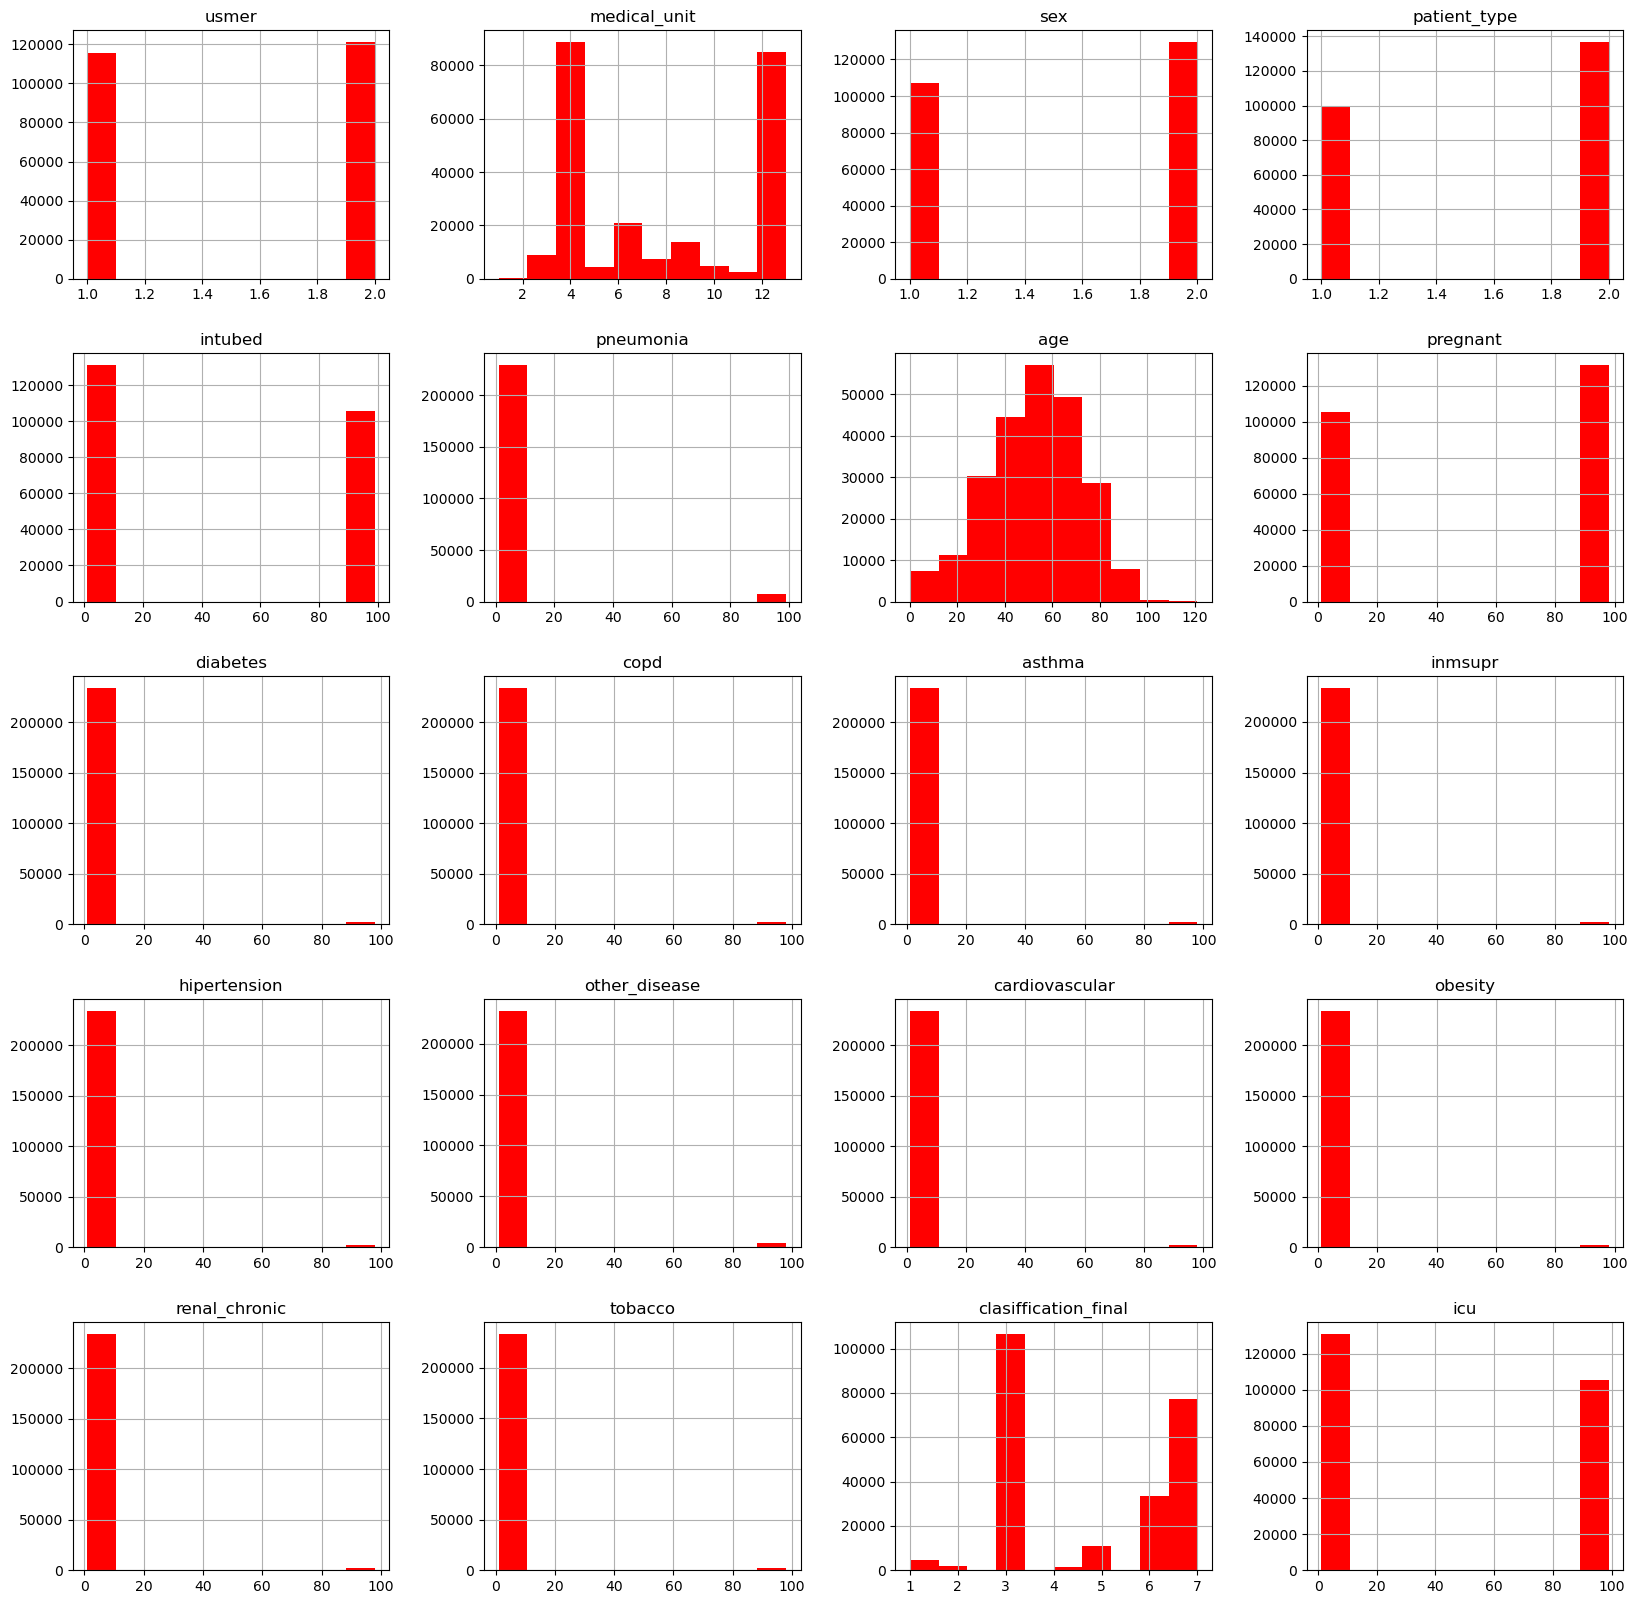

In [20]:

# Plotting all the numerical columns using histogram
df.hist(figsize=(20,20),color='red')
plt.show()

In [21]:
# Finding unique values of all the columns
df.apply(np.unique)

usmer                                                              [1, 2]
medical_unit                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
sex                                                                [1, 2]
patient_type                                                       [1, 2]
date_died               [01/01/2021, 01/02/2020, 01/02/2021, 01/03/202...
intubed                                                    [1, 2, 97, 99]
pneumonia                                                      [1, 2, 99]
age                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
pregnant                                                   [1, 2, 97, 98]
diabetes                                                       [1, 2, 98]
copd                                                           [1, 2, 98]
asthma                                                         [1, 2, 98]
inmsupr                                                        [1, 2, 98]
hipertension                          

### Finding missing values in the columns

In [22]:
# count of missing values with 97
df[df == 97.0].count()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
date_died                    0
intubed                  99882
pneumonia                    0
age                        121
pregnant                129503
diabetes                     0
copd                         0
asthma                       0
inmsupr                      0
hipertension                 0
other_disease                0
cardiovascular               0
obesity                      0
renal_chronic                0
tobacco                      0
clasiffication_final         0
icu                      99882
dtype: int64

In [23]:

# count of missing values with 98
df[df == 98.0].count()

usmer                      0
medical_unit               0
sex                        0
patient_type               0
date_died                  0
intubed                    0
pneumonia                  0
age                      103
pregnant                1954
diabetes                2840
copd                    2529
asthma                  2506
inmsupr                 2926
hipertension            2620
other_disease           4362
cardiovascular          2603
obesity                 2554
renal_chronic           2531
tobacco                 2738
clasiffication_final       0
icu                        0
dtype: int64

In [24]:

# count of missing values with 99
df[df == 99.0].count()

usmer                      0
medical_unit               0
sex                        0
patient_type               0
date_died                  0
intubed                 5505
pneumonia               7187
age                       84
pregnant                   0
diabetes                   0
copd                       0
asthma                     0
inmsupr                    0
hipertension               0
other_disease              0
cardiovascular             0
obesity                    0
renal_chronic              0
tobacco                    0
clasiffication_final       0
icu                     5654
dtype: int64

### Data Cleaning



1. date_died Column



In [25]:
# Counting values of 'date_died' column
df['date_died'].value_counts()

9999-99-99    160561
07/07/2020       984
06/07/2020       980
13/07/2020       970
16/06/2020       960
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: date_died, Length: 401, dtype: int64

In [26]:
# data cleaning in date-died column
df.date_died[df['date_died'] != '9999-99-99'] = 'Died'
df.date_died[df['date_died'] == '9999-99-99'] = 'Alive'
df.date_died.value_counts()

Alive    160561
Died      75965
Name: date_died, dtype: int64

In [27]:
# Adding a new column 'death'
df['death'] = df.date_died
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,death
0,2,1,1,1,Died,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,Died
1,2,1,2,1,Died,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,Died
2,2,1,2,2,Died,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,Died
3,2,1,1,1,Died,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,Died
4,2,1,2,1,Died,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,Died


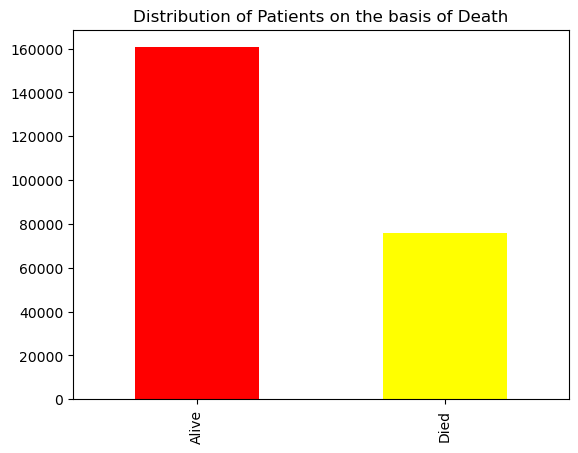

In [28]:
# Plotting Barplot for date-died Column to check the ratio of people on the basis of their death
df['date_died'].value_counts().plot(kind='bar',color=('red','yellow'), title = 'Distribution of Patients on the basis of Death')
plt.show()

In [29]:
# dropping date_died column
df.drop(['date_died'],axis=1,inplace=True)
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'intubed', 'pneumonia',
       'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu', 'death'],
      dtype='object')

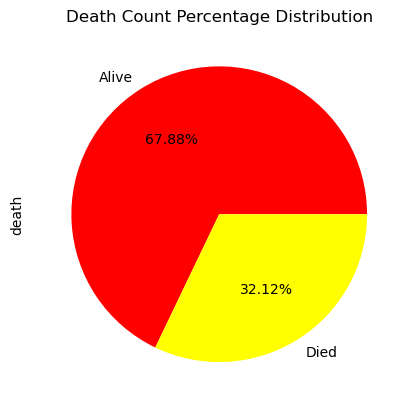

In [30]:
# Plotting percentage distribution of death. 
df['death'].value_counts().plot(kind='pie', autopct='%.2f%%', title = 'Death Count Percentage Distribution', colors=('red','yellow'))
plt.show()

2. Sex Column



In [31]:
# counting values of sex column
df['sex'].value_counts()

2    129503
1    107023
Name: sex, dtype: int64

In [32]:

# Replacing the values
df['sex'].replace({1:'Female', 2:'Male'}, inplace = True)
df['sex'].value_counts()
     

Male      129503
Female    107023
Name: sex, dtype: int64

3. Pregnant Column



In [33]:
# counting values of pregnant column
df['pregnant'].value_counts()

97    129503
2     102049
1       3020
98      1954
Name: pregnant, dtype: int64

In [34]:
df.groupby(['sex','pregnant'])[['sex']].count()


sex
sex    pregnant        
Female 1           3020
       2         102049
       98          1954
Male   97        129503

In [35]:
# Replacing values in the pregnant column
df['pregnant'].replace({97 : 2, 98 : np.nan}, inplace = True)
df['pregnant'].value_counts()

2.0    231552
1.0      3020
Name: pregnant, dtype: int64

In [36]:
# Checking null values in the pregnant column 
df['pregnant'].isna().sum()

1954

4. Patient_type Column



In [37]:
# counting values of 'patient_type' column
df['patient_type'].value_counts()

2    136644
1     99882
Name: patient_type, dtype: int64

In [38]:
# data cleaning in 'patient_type' column
df['patient_type'].replace({1: 'Not Hospitalized',2: 'Hospitalized'}, inplace = True)
df['patient_type'].value_counts()


Hospitalized        136644
Not Hospitalized     99882
Name: patient_type, dtype: int64

In [39]:
df.groupby(['patient_type','intubed'])[['patient_type']].count()


patient_type
patient_type     intubed              
Hospitalized     1               32295
                 2               98844
                 99               5505
Not Hospitalized 97              99882

In [40]:
df.groupby(['patient_type','icu'])[['patient_type']].count()


patient_type
patient_type     icu              
Hospitalized     1           15383
                 2          115607
                 99           5654
Not Hospitalized 97          99882

5. Clasiffication_final Column



In [41]:
# counting values of 'clasiffication_final' column
df['clasiffication_final'].value_counts()
     

3    106712
7     77075
6     33629
5     10900
1      4730
2      1846
4      1634
Name: clasiffication_final, dtype: int64

In [46]:
# checking unique values of clasiffication_final Column
df['clasiffication_final'].unique()

array(['3', 'Carrier or inconclusive', '1', '2'], dtype=object)

### Replacing all the missing values into null values

 

In [47]:
# replacing all the missing values into nan values
df.replace([97,98,99], np.nan , inplace=True)

In [48]:
df.isna().sum()


usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
intubed                 105387
pneumonia                 7187
age                        308
pregnant                  1954
diabetes                  2840
copd                      2529
asthma                    2506
inmsupr                   2926
hipertension              2620
other_disease             4362
cardiovascular            2603
obesity                   2554
renal_chronic             2531
tobacco                   2738
clasiffication_final         0
icu                     105536
death                        0
dtype: int64

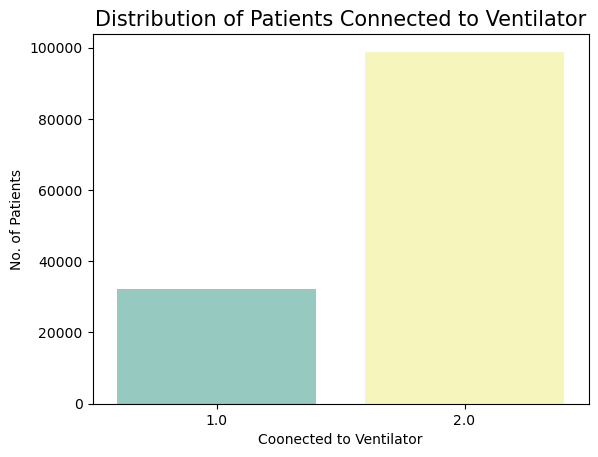

In [49]:
df['intubed'].value_counts()

sns.countplot(x= df['intubed'])
plt.title('Distribution of Patients Connected to Ventilator', fontsize = 15)
plt.xlabel('Coonected to Ventilator')
plt.ylabel('No. of Patients')
plt.show()

This plot shows 2 is more than 1 which means less no. of patients are connected to ventilator.

### Showing Distribution of Patients admitted to ICU.



In [50]:
df['icu'].value_counts()


2.0    115607
1.0     15383
Name: icu, dtype: int64

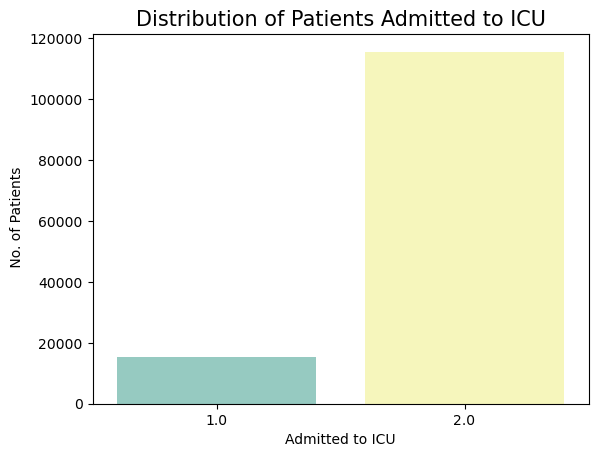

In [51]:
sns.countplot(x= df['icu'])
plt.title('Distribution of Patients Admitted to ICU',fontsize=15)
plt.xlabel('Admitted to ICU')
plt.ylabel(' No. of Patients')
plt.show()

This plot shows 2 is more than 1 which implies that only 15383 patients are admitted in the ICU out of 130990 patients

There are so many null values in ICU and intubed column so we are going to drop these two columns.



In [52]:
# dropping columns
df.drop(columns=["intubed","icu"], inplace=True)
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'pneumonia', 'age',
       'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'clasiffication_final', 'death'],
      dtype='object')

### Dropping Null Values



In [53]:
# Dropping null values
df = df.dropna(how='any',axis = 0)
df.isna().sum()

usmer                   0
medical_unit            0
sex                     0
patient_type            0
pneumonia               0
age                     0
pregnant                0
diabetes                0
copd                    0
asthma                  0
inmsupr                 0
hipertension            0
other_disease           0
cardiovascular          0
obesity                 0
renal_chronic           0
tobacco                 0
clasiffication_final    0
death                   0
dtype: int64

In [54]:
# Statistical Information of all the numerical columns
df.describe()

,usmer,medical_unit,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
count,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000
mean,1.525230,7.536672,1.560828,53.063373,1.987376,1.678255,1.939661,1.931873,1.947046,1.616684,1.915405,1.922142,1.726527,1.925244,1.859639
std,0.499364,3.649664,0.496287,19.019905,0.111645,0.467147,0.238114,0.251964,0.223942,0.486195,0.278279,0.267948,0.445742,0.262998,0.347362
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,40.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,2.000000,6.000000,2.000000,54.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,12.000000,2.000000,67.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,13.000000,2.000000,121.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [55]:
# information of categorical columns
df.describe(include='O')

,sex,patient_type,clasiffication_final,death
count,220852,220852,220852,220852
unique,2,2,4,2
top,Male,Hospitalized,Carrier or inconclusive,Alive
freq,122330,129810,111036,147274


### Data Visualization



#### Sex Column



1. Percentage Distribution of Patients Sex wise


In [56]:
df['sex'].value_counts()


Male      122330
Female     98522
Name: sex, dtype: int64

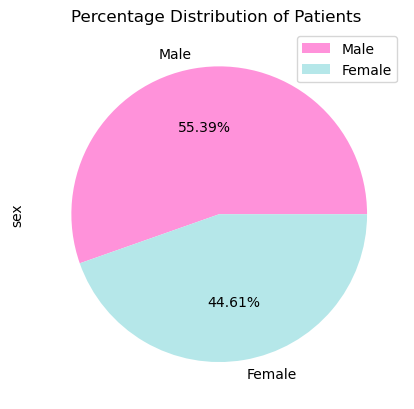

In [57]:
df['sex'].value_counts().plot(kind='pie' , autopct = '%.2f%%', colors=('#FF92DA','#B5E7E9'), title='Percentage Distribution of Patients ')
plt.legend(df['sex'].value_counts().index)
plt.show()

This Plot Shows the percentage male contains the larger part which is around 55.39% than females which is around 44.61%

2.Sex Wise Distribution of Patients on the basis of Death.


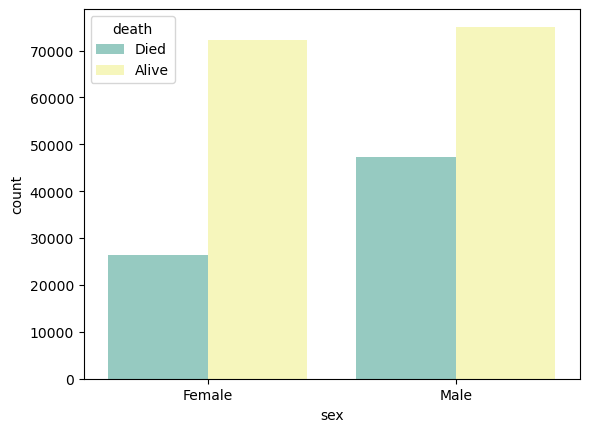

In [59]:
sns.countplot(data=df , x = 'sex', hue= 'death')
plt.show()

This Plot clearly shows that rate of male in terms of death is higher than females which implies more males were died as compraed to females.

3.Sex wise Distribution of Patients on the basis of Patient_type


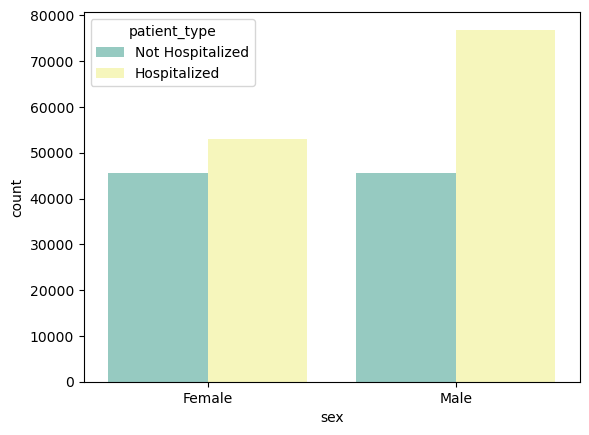

In [60]:
sns.countplot(data = df , x = 'sex' , hue = 'patient_type')
plt.show()
     

This plot clearly Shows that more males are hospitalized as compared to females in the Covid Period.



4.Average Distribution of Different Diseases Sex Wise


In [62]:
d1 = df.groupby(['sex'])[['pneumonia','diabetes','copd','asthma','inmsupr','hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic']].mean()
d1

,pneumonia,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic
sex,,,,,,,,,,
Female,1.606961,1.667587,1.934624,1.910051,1.938440,1.598171,1.901423,1.921175,1.702452,1.925174
Male,1.523674,1.686847,1.943718,1.949448,1.953977,1.631595,1.926666,1.922922,1.745917,1.925300


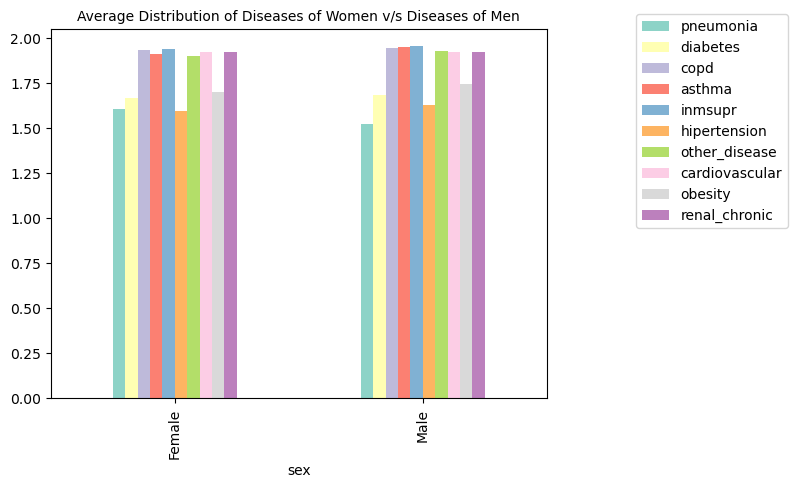

In [63]:
d1.plot(kind = 'bar')
plt.title('Average Distribution of Diseases of Women v/s Diseases of Men', fontsize=10)
plt.legend(loc='right', bbox_to_anchor=(1,0.5,0.5,0.5))
plt.show()

### Age Column



1. Age Distribution


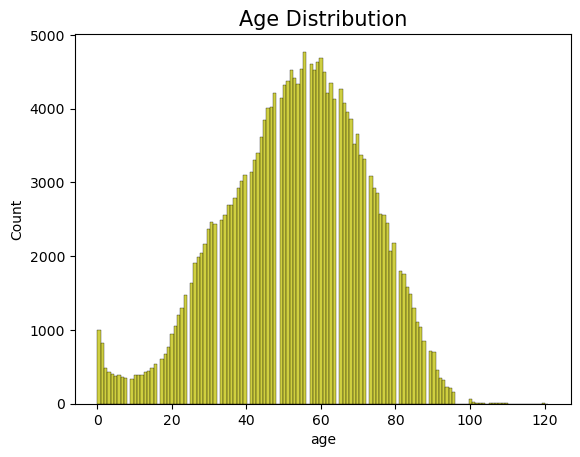

In [65]:
sns.histplot(df['age'],color=('y'))
plt.title('Age Distribution', fontsize=15)
plt.show()

Patients are Roughly Between 20 - 60 Years Old



2.Age Distribution Death Wise


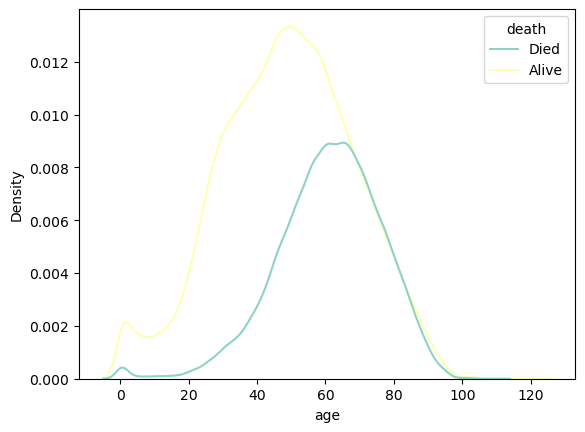

In [66]:
sns.kdeplot(data = df, x = 'age', hue = 'death')
plt.show()

It is clearly shown from this plot that Older Patients re more likely to die compare to younger ones.

3.Age Distribution Patient_type wise


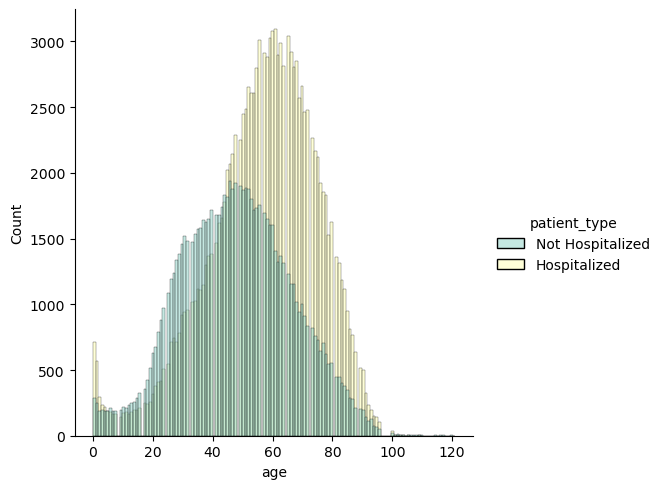

In [68]:
sns.displot(data = df , x = 'age' , hue = 'patient_type')
plt.show()

This plot clearly shows that patients ranging between 40-60 ages are more hospitalized



4.Distribution of Patients Consuming Tobacco Age wise


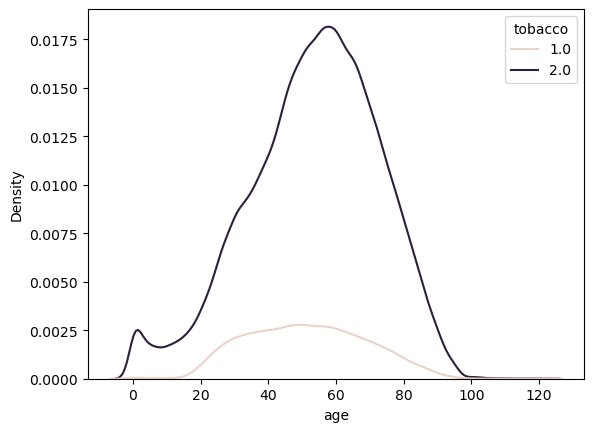

In [69]:
sns.kdeplot(data = df, x = 'age', hue = 'tobacco')
plt.show()


This plot Shows Age range between 30-70 Consumes more tobacco



### Death Column



1. Sex and Death Wise Average Distribution of Different Diseases.


In [70]:
d2 = df.groupby(['death','sex'])[['pneumonia','diabetes','asthma','hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic','copd','inmsupr']].mean()
d2

pneumonia  diabetes    asthma  hipertension  other_disease  \
death sex                                                                  
Alive Female   1.718584  1.701877  1.887788      1.632486       1.891709   
      Male     1.669632  1.705829  1.926674      1.640866       1.913982   
Died  Female   1.301021  1.573604  1.971067      1.504120       1.928048   
      Male     1.291675  1.656675  1.985648      1.616858       1.946826   

              cardiovascular   obesity  renal_chronic      copd   inmsupr  
death sex                                                                  
Alive Female        1.915481  1.689409       1.929584  1.934252  1.931357  
      Male          1.909188  1.717722       1.921640  1.936782  1.943361  
Died  Female        1.936781  1.738201       1.913088  1.935642  1.957854  
      Male          1.944751  1.790733       1.931119  1.954743  1.970852

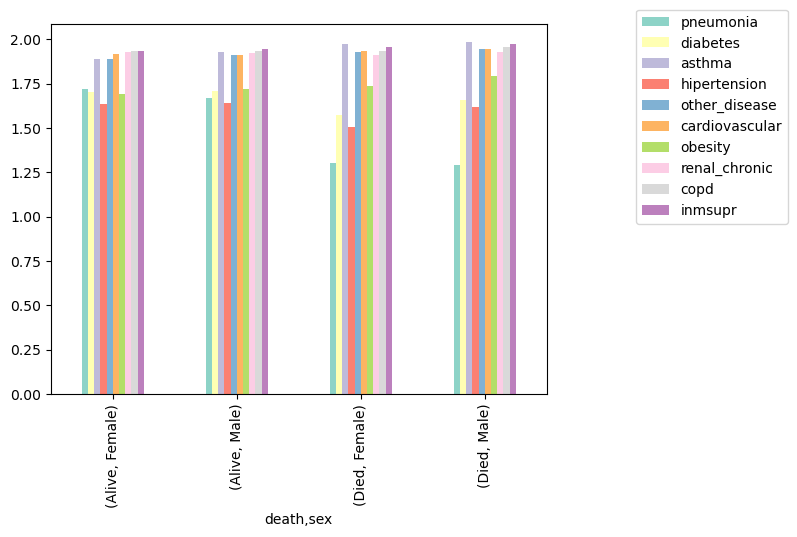

In [71]:
d2.plot(kind='bar')
plt.legend(loc='right' , bbox_to_anchor = (1,0.5,0.5,0.5))
plt.show()

Tobacco Column



2.Distribution of Patients Consuming Tobacco Gender wise


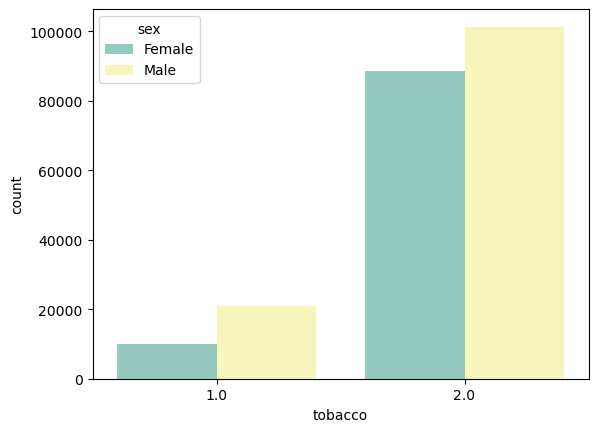

In [74]:
# 1 implies Yes and 2 implies No

sns.countplot(data = df , x = 'tobacco', hue= 'sex')
plt.show()

This plot clearly shows there are very few Female Patients who are consuming Tobacco than Males.

Patient_type Column



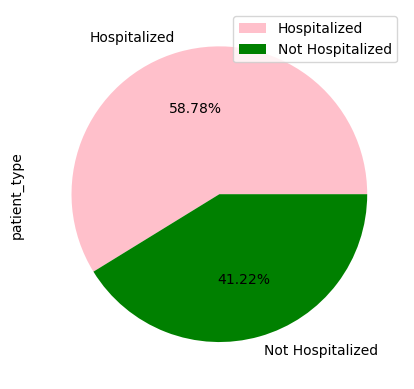

In [75]:
# Patient_Type Count Distribution

df['patient_type'].value_counts().plot(kind='pie' , autopct = '%.2f%%', colors=('pink','green'))
plt.legend(df['patient_type'].value_counts().index)
plt.show()

This Plot Shows 58.78% of Patients are hospitalized



Clasiffication_final Column



In [76]:
df['clasiffication_final'].value_counts()


Carrier or inconclusive    111036
3                          103476
1                            4546
2                            1794
Name: clasiffication_final, dtype: int64

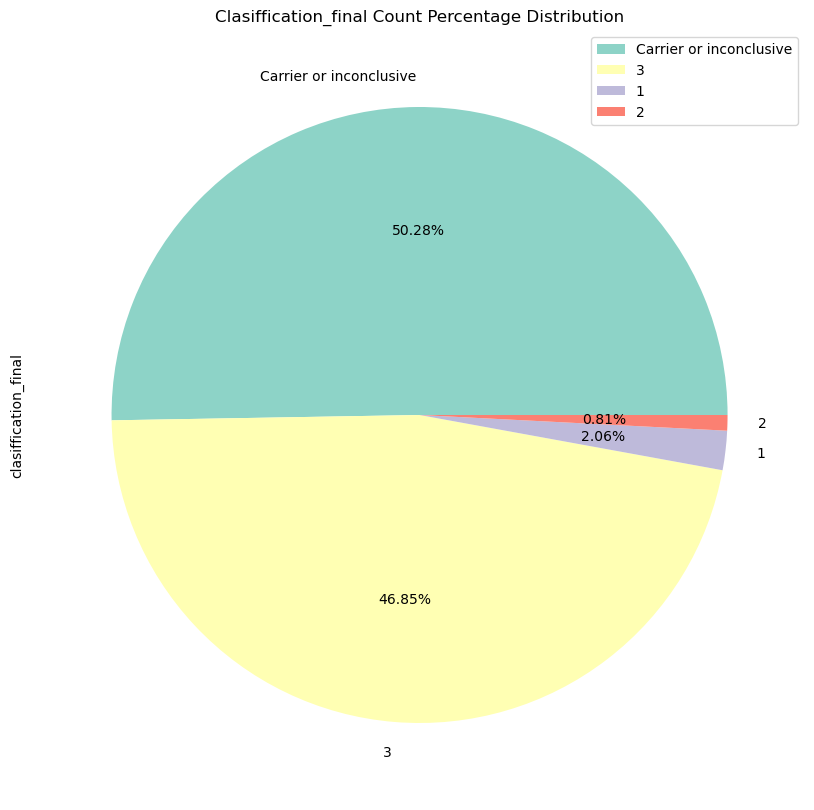

In [77]:
plt.figure(figsize=(10,10))
df['clasiffication_final'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Clasiffication_final Count Percentage Distribution')
plt.legend(df['clasiffication_final'].value_counts().index)
plt.show()

This Plot shows more than 50 % of the patients were not covid carrier.



In [78]:
# showing the correlation table
corr = df.corr()
corr

,usmer,medical_unit,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
usmer,1.000000,0.033314,0.095318,-0.038204,-0.010774,0.022434,-0.003648,-0.014841,-0.014513,0.020829,-0.008509,-0.012104,-0.025910,0.021463,-0.023295
medical_unit,0.033314,1.000000,-0.048240,-0.071780,-0.023367,0.019020,-0.009620,-0.032410,-0.008491,0.054757,0.078402,-0.029475,-0.030360,0.033160,-0.033069
pneumonia,0.095318,-0.048240,1.000000,-0.179875,-0.060098,0.065355,-0.009135,-0.119340,-0.037160,0.033824,-0.060295,-0.037372,-0.030552,-0.006755,-0.070389
age,-0.038204,-0.071780,-0.179875,1.000000,0.140501,-0.217863,-0.162789,0.126060,0.061037,-0.295622,0.058353,-0.086763,0.052287,-0.031521,0.036315
pregnant,-0.010774,-0.023367,-0.060098,0.140501,1.000000,-0.059820,-0.024735,-0.000634,-0.011525,-0.071044,0.012847,-0.026952,-0.024607,-0.027822,-0.027943
diabetes,0.022434,0.019020,0.065355,-0.217863,-0.059820,1.000000,0.040927,-0.053509,-0.008951,0.280267,-0.045460,0.049074,0.045982,0.129213,-0.027535
copd,-0.003648,-0.009620,-0.009135,-0.162789,-0.024735,0.040927,1.000000,0.018123,0.019813,0.073136,-0.003917,0.072776,0.004808,0.020954,0.070868
asthma,-0.014841,-0.032410,-0.119340,0.126060,-0.000634,-0.053509,0.018123,1.000000,0.001625,-0.035460,-0.012710,-0.007340,0.041498,-0.035380,-0.000925
inmsupr,-0.014513,-0.008491,-0.037160,0.061037,-0.011525,-0.008951,0.019813,0.001625,1.000000,-0.023117,0.113831,0.028105,-0.026276,0.078320,-0.014466
hipertension,0.020829,0.054757,0.033824,-0.295622,-0.071044,0.280267,0.073136,-0.035460,-0.023117,1.000000,-0.017017,0.129361,0.088606,0.161455,-0.020896


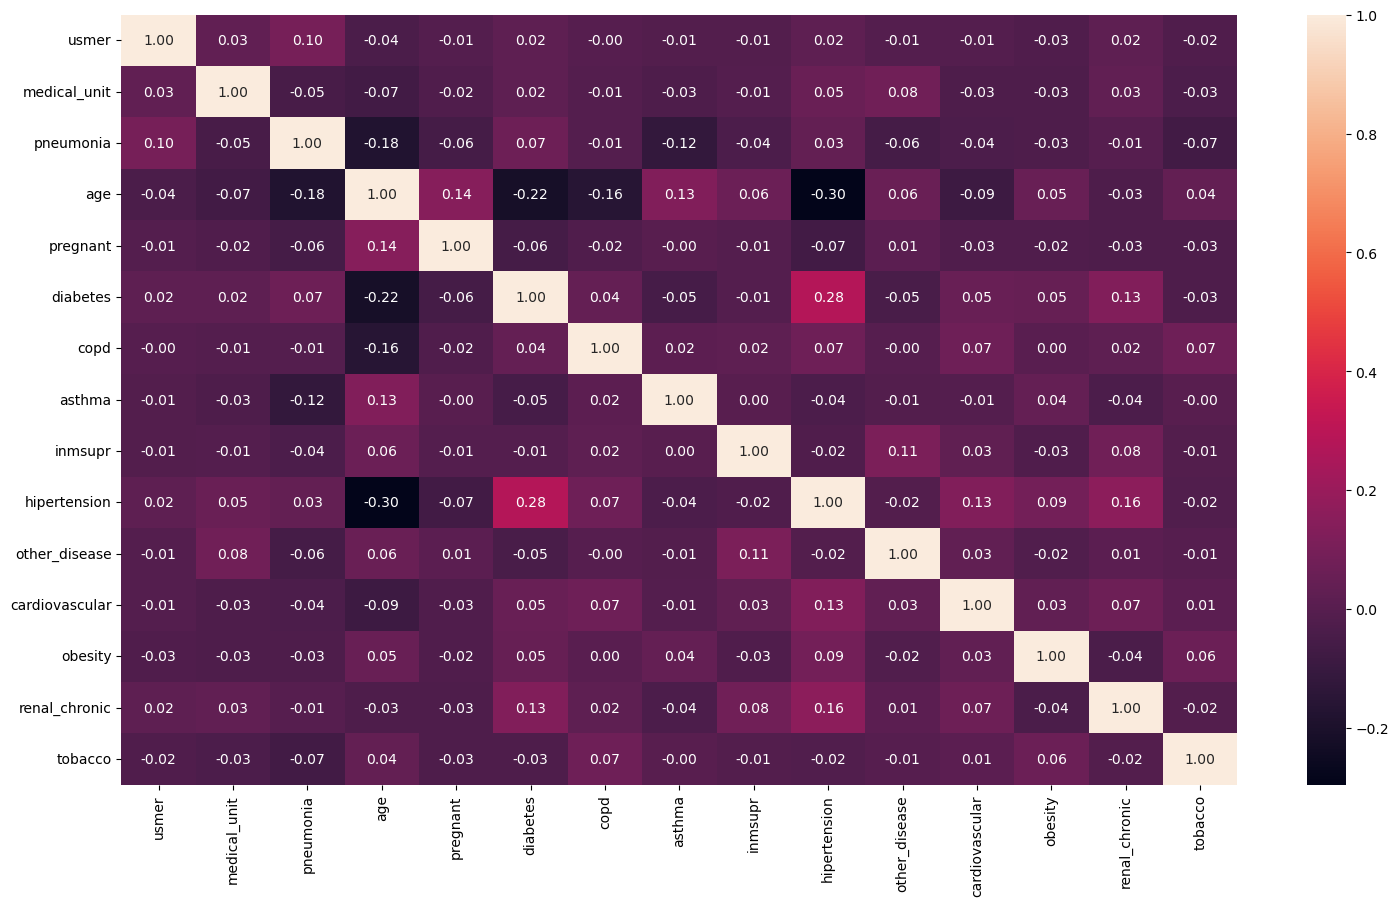

In [79]:
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

submitted by
ABIN K PRAKASH